### Distribution of obtainable sums

In [116]:
import numpy as np
from collections import defaultdict
from itertools import product, combinations

def modinv(a, q):
    """Modular inverse in F_q."""
    a = int(a)
    if a == 0:
        raise ValueError("No inverse for zero")
    try:
        return pow(a, -1, q)
    except:
        print(a,q)

def classify_columns_by_type(A, q):
    """Classify columns in A by their types."""
    types = {'00': [], '10': [], '01': [], '11': defaultdict(list)}
    for i in range(A.shape[1]):
        a0, a1 = int(A[0, i]), int(A[1, i])
        key = ('0' if a0 == 0 else '1') + ('0' if a1 == 0 else '1')
        if key == '11':
            ratio = (a0 * modinv(a1, q)) % q
            types['11'][ratio].append(i)
        else:
            types[key].append(i)
    return types

def do(B,k,q):
    types_B = classify_columns_by_type(B, q)
    z=[len(types_B["11"][i]) for i in types_B["11"].keys()]
    z+= [len(types_B["00"]),len(types_B["01"]),len(types_B["10"])]
    # print(z)
    return subset_sum_dp(z,k)
    
import random

def subset_sum_dp(nums, target):
    n = len(nums)
    total = sum(nums)
    dp = [[False] * (total + 1) for _ in range(n + 1)]
    dp[0][0] = True

    for i in range(1, n + 1):
        num = nums[i - 1]
        for t in range(total + 1):
            if t >= num:
                dp[i][t] = dp[i - 1][t] or dp[i - 1][t - num]
            else:
                dp[i][t] = dp[i - 1][t]
    return dp[n]



In [117]:
import matplotlib.pyplot as plt
def plot(L,label_list):
    """
    function to plot list of lists of the form L=[L1,L2,...] with Li=[[x1,y1],[x2,y2],...]
    """
    c=0
    for Li in L:
        x,y=zip(*Li)
        if c%2==0:
            color="blue"
            s=1
        else:
            color="red"
            s=1
        plt.scatter(x,y, label=label_list[c],s=s,color=color)
        c+=1
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [118]:
import random
from typing import List, Tuple

def generate_two_vectors(n: int, q: int, w: int) -> Tuple[List[int], List[int]]:
    """Generate two random vectors in Fq^n with Hamming weight w."""
    if not (0 <= w <= n):
        raise ValueError("Weight w must be between 0 and n.")
    if q <= 1:
        raise ValueError("Field size q must be at least 2.")

    def random_vector() -> List[int]:
        vec = [0] * n
        positions = random.sample(range(n), w)
        for pos in positions:
            vec[pos] = random.randint(1, q - 1)  # non-zero in Fq
        return vec

    return random_vector(), random_vector()

In [119]:
from math import comb as binom
def gv_distance(n,k,q):
    """
    Gilbert - Varshamov distance of a code over Fq, with length n and dimension k
    """
    d = 1
    right_term = q**(n-k)
    left_term = 0
    while left_term <= right_term:
        left_term += binom(n,d)*(q-1)**d
        d+=1

    return d

In [125]:
RATE= 0.4
n=1000

first_x_primes = 100
weight_scaling=1

In [128]:
from sympy import isprime

def random_row(n, w, q):
    row = np.zeros(n, dtype=int)
    idx = np.random.choice(n, w, replace=False)
    row[idx] = np.random.randint(1, q, size=w)
    return row
L=[]
k=int(n*RATE)
y=0
for q in range(2,20000):
    if not(isprime(q)):
        continue

    w=int(weight_scaling*gv_distance(n,k,q))
    deviation=0
    while True:
        v1,v2=generate_two_vectors(n,q,w)
        A = np.vstack([np.array(v1),np.array(v2)])
        B = np.vstack([np.array(v1),np.array(v2)])

        test = classify_columns_by_type(B,q)
        sumi =sum([len(test["11"][i]) for i in test["11"].keys()])
        if sumi>=w**2/n:
             break

    test_arr=do(B,k,q)
    
    c=0
    L1=[]
    L2=[]
    for i in test_arr:
        # test_arr includes the obtainable subset sums as a dictonary
        # if a sum is reachable we add it to L1 otherwise to L2. 
        # here I use y as the y-coordinate instead of q, where q is the y-th prime (so we have no gaps in the plot when there are gaps between consecutive primes)
        if i:
            L1.append([c,y])
            
        else:
            L2.append([c,y])
            if c==k:
                # this means for the given q, k was not reachable as a sum, which means we only got an approx solution
                print("For q="+str(q)+" sum k was not reachable")
        c+=1
    y+=1
    
    if y==first_x_primes:
        break
    L.append(L1)
    if len(L2)==0:
        #to avoid errors
        L2.append([0,0])
    L.append(L2)
    
print("done")

For q=2 sum k was not reachable
For q=3 sum k was not reachable
For q=5 sum k was not reachable
For q=7 sum k was not reachable
For q=11 sum k was not reachable
For q=13 sum k was not reachable
done


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


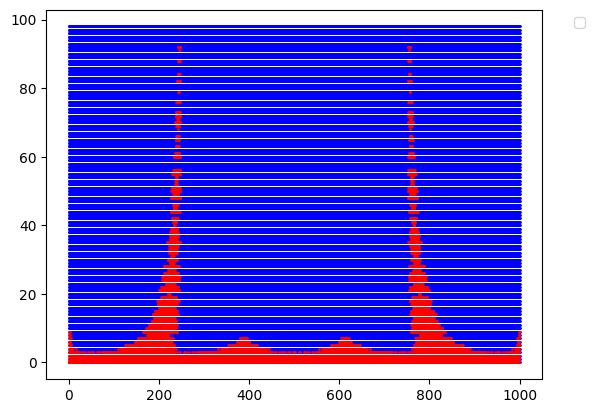

In [127]:
plot([*L],["" for i in range(len(L))])